# Machine learning obecně
## Teorie
Machine learning je sada nástrojů, jak přimět stroje používat schopnosti typické převážně pro lidi. Mezi takové schopnosti může patřit například učení se, schopnost abstrakce, schopnost zjednodušení zanedbáním nepodstatných věcí... Mezi nejčastěji používané nástroje a algoritmy patří neuronové sítě v mnoha podobách (konvoluční, rekurentní, deep, autoenkodéry), rozhodovací stromy, analýza hlavních komponent (PCA), genetické algoritmy, support vector machine, mnoho typů regresí, t-SNE, K-means clusterování, random forest, Bayesovské přístupy, ANOVA a mnoho mnoho dalšího...

K čemu tyto algoritmy mohou sloužit?

**Predikce <br>
Klasifikace <br>
Clusterování <br>
Detekce anomálií <br>
Optimalizace <br>
A mnoho dalšího <br>**

### Kurikulum pro machine learning
[Výukové materiály](https://github.com/llSourcell/Learn_Machine_Learning_in_3_Months) k tomu co bude třeba. Lineární algebra, statistika... Stačí se vracet až když budete potřebovat.
### Zdroje
[Youtube playlist s názvem Machine learning](https://www.youtube.com/playlist?list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF) od velmi pěkně udělaného youtube kanálu

Dalším obrovským zdrojem inspirace je [Siraj raval](https://www.youtube.com/channel/UCWN3xxRkmTPmbKwht9FuE5A). Siraj má mnoho konkrétních ukázek aplikací neuronových sítí, mnoho videí o různých knihovnách. Nutno podotknout, že je vše ve velmi svižném tempu a velmi líbivou formou.

Následující slova budou o jedné z mnoha metod používaných ke klasifikaci a predikci - o rozhodovacích stromech

## Decision trees
Youtube video pro uvedení do problému. Pokud nemáte video zobrazené, musíte danou buňku spustit.
### Decision trees pt.1

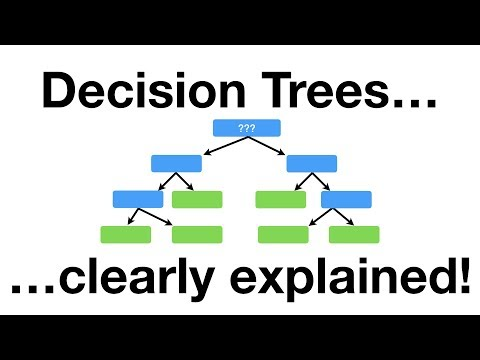

In [51]:
from IPython.display import YouTubeVideo
YouTubeVideo('7VeUPuFGJHk')

### Decision trees pt.2

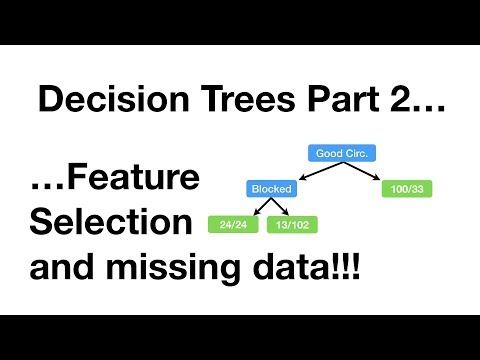

In [52]:
YouTubeVideo('wpNl-JwwplA')

## Praktický příklad
**Př.** Chceme zjistit, zda pojistit, či nepojistit pacienta. Máme k dispozici data - viz tabulka. U těchto pacientů již víme, zda je výhodné pacienta pojistit, nebo ne. Jde tedy o tzv. učení s učitelem. O dalších pacientech však tuto informaci nemáme, zato hodnoty z ostatních sloupečků ano. Tyto hodnoty následně použijeme, abychom dostali hodnotu kterou zatím nemáme a kterou chceme získat. 

Potřebujeme určit, který ze sloupečků nám řekne pro naše rozhodnutí nejvíc.
To bude ten sloupeček, ve kterém bude nejvíc jedniček shodných se sloupečkem **Pojistit?**
<img src="img/tabulka.png"  width=400>

Poslední dva pacienty nezahrnem do výpočtů!!  Pro nás jsou testovací množinou (Prvních pět je potom trénovací množinou).

Důležitost sloupce nám určí tzv. Gini index. V našem případě si pro první sloupeček kuřák uděláme dvě hromádky. Dále postupujeme podle obrázku. Pro všechny kuřáky zjistíme, kolik jich bylo pojištěno, a kolik nepojištěno. To samé si zjistíme pro nekuřáky. Snažíme se Gini index minimalizovat.
<img src="img/Gini.png"  width=400>

Bereme v potaz jenom řádky, kde známe všechny potřebné informace.

<img src="img/ginivypocet.png"  width=700>

Takto vypočteme GINI indexy pro všechny sloupečky
V této ukázce je vidět že GINI kuřáků vyšlo 0 – to znamená, že pokud je člověk kuřák, můžeme říct, že ho pojistíme – opravdu z tabulky je vidět, že se nestane, že u kuřáka by byla v kolonce pojistit 0 – je to samozřejmě jen ukázkový případ s náhodně zvolenými čísly, navíc s kriticky malým vzorkem dat – pouze pro manifestaci postupu.

Nyní víme, který sloupec je nejdůležitější. Tzv. Root node, čili první uzel stromu je pro nás tedy kuřák/nekuřák. Dále rozdělíme vzorek na dvě množiny (kuřáci, nekuřáci) a počítáme opět nový nejdůležitější sloupec pro každou množinu zvlášť, tím uděláme druhou větev stromu. Takto postupujeme až vytvoříme celý strom.

Vyhodnocení provedeme tak, že z trénovací množiny vezmeme pacienta, podíváme se, zda je kuřák, či ne, a postupujeme dále po stromu přes další a další větve stromu. Dojdeme až na konec, kde vidíme, kolik pacientů s přesně touto charakteristikou bylo pojištěno a kolik ne.

U následujícího obrázku pro pacienta, který měl Good Circ ano, ano u Blocked, a ano u Chest Pain, 17 pacientů bylo pojištěno a 3 pacienti ne.
Nejen že vidíme, zda pojistit, či ne, ale i s jakou přesností výsledek víme.
K obdobnému výsledku se lze dostat i pro spojité veličiny!!!

<img src="img/Obrázek2.png"  width=400>



# Aplikace rozhodovacího stromu
Uveďme nyní celý kód z Edureky a rozeberme si ho. Na začátku máme uvedení kódování, v němž je kód napsán a docstring (to co je mezi třemi uvozovkami '''), tzn. popis toho, o čem kód je.
Následující komentáře budou již jako komentáře uvnitř kódu, aby šel kód spustit pod jedinou buňkou.

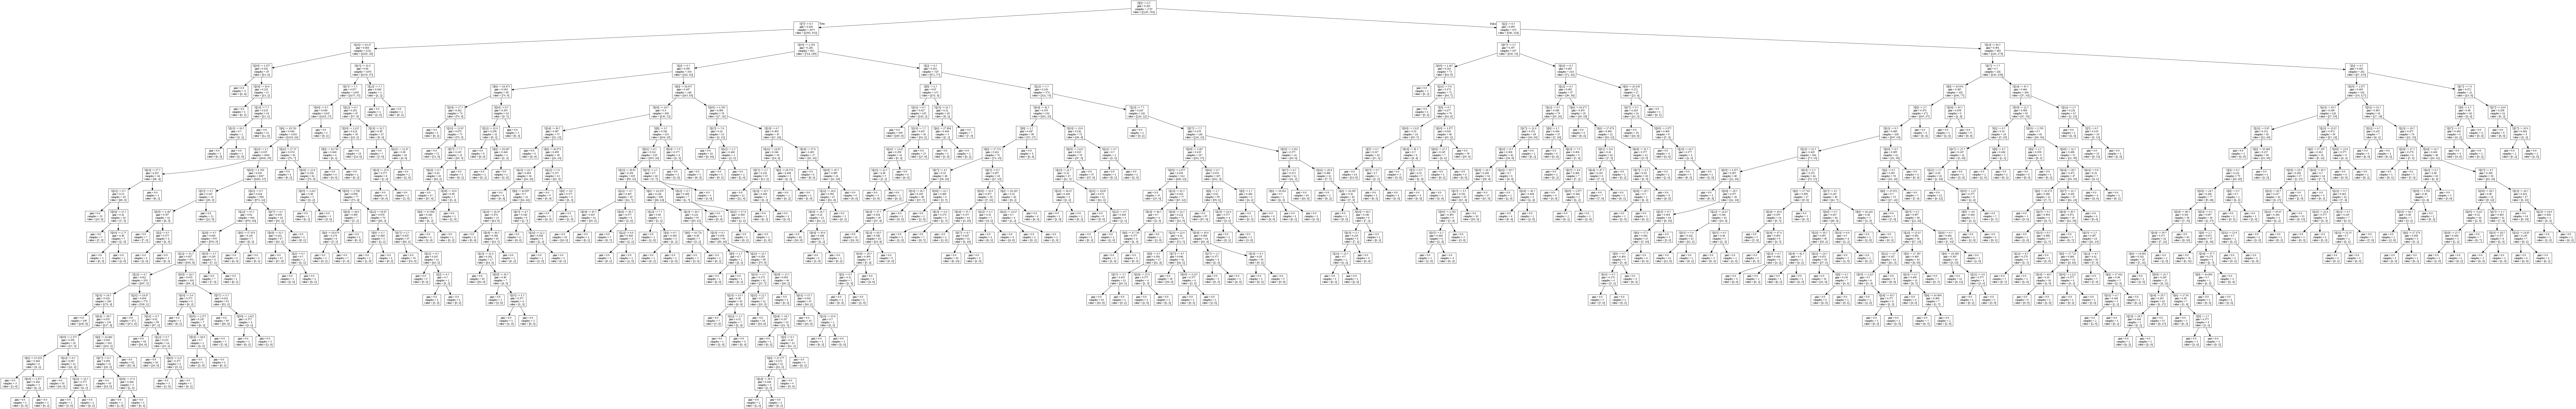

In [23]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec 13 21:12:54 2015

@author: ldierker
"""
# Následuje pro nás velmi důležitá část - import modulů a funkcí, které jsou potřeba
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

# Následuje změna pracovní složky pro následný import dat
# Vložte cestu s vaším .csv souborem
# všimněme si r před stringem, to značí
# pohlížet na string jako na raw string - některé lomítko
# s písmenem totiž může být vráceno jako 
# funkce a cesta potom nemusí fungovat
# !!! Lepší je používat relativní cestu - právě pro přenos kódu na jiné zařízení !!!

os.chdir(r"C:\Users\daniel.malachov\Desktop\Cours\Machine learning for data analysis\Datasets")

"""
Data Engineering and Analysis
"""

# Načtení datasetu pomocí funkce .read_csv 

AH_data = pd.read_csv("tree_addhealth.csv")

data_clean = AH_data.dropna()

data_clean.dtypes
data_clean.describe()


"""
Modeling and Prediction
"""

# Rozdělení na trénovací a testovací množinu

predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'age','ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

targets = data_clean.TREG1

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

# Natrénování modelu - není co komentovat. Celé natrénování provede importovaná funkce

classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

# Confusion matrix nám řekne kolik kladných odhadů bylo správně, 
# kolik záporných odhadů bylo správně a kolikr8t se model spletl

sklearn.metrics.confusion_matrix(tar_test,predictions)
sklearn.metrics.accuracy_score(tar_test, predictions)

# Zobrazení stromu

from sklearn import tree
from io import StringIO
from IPython.display import Image
out = StringIO()

# Kód využívá k zobrazení Graphviz. Pokud ho nemáte, možná se strom nezobrazí.
# Kromě instalace je potřeba přidat cestu  graphviz enviromentální proměnné

tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())



Pro případ, že se vám strom nezobrazil a nebo nechcete instalovat Graphviz. <br> 
Obrázek vypadá takto
<img src="img/strom.png"  width=700>